In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2CDB7H/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2CDB7H/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2CDB7H/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [6]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 31s 62ms/step - loss: 0.5799 - acc: 0.6524 - val_loss: 0.3153 - val_acc: 0.8716
Epoch 2/10
391/391 [==============================] - 16s 39ms/step - loss: 0.2270 - acc: 0.9154 - val_loss: 0.2994 - val_acc: 0.8784
Epoch 3/10
391/391 [==============================] - 15s 36ms/step - loss: 0.1643 - acc: 0.9420 - val_loss: 0.3185 - val_acc: 0.8743
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 0.1264 - acc: 0.9575 - val_loss: 0.3603 - val_acc: 0.8708
Epoch 5/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0972 - acc: 0.9675 - val_loss: 0.4354 - val_acc: 0.8615
Epoch 6/10
391/391 [==============================] - 14s 34ms/step - loss: 0.0782 - acc: 0.9761 - val_loss: 0.5193 - val_acc: 0.8586
Epoch 7/10
391/391 [==============================] - 14s 34ms/step - loss: 0.0570 - acc: 0.9838 - val_loss: 0.5700 - val_acc: 0.8554
Epoch 8/10
391/391 [==============================] - 14s 34ms

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

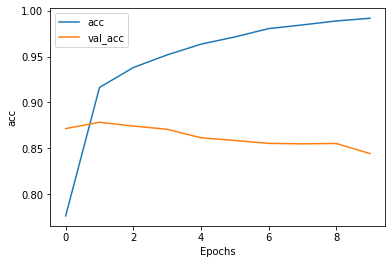

In [9]:
plot_graphs(history, 'acc')

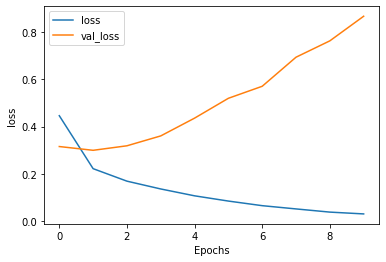

In [10]:
plot_graphs(history, 'loss')